In [34]:
import numpy as np
import sympy as sp
from sympy import expand, symbols, Function, Expr, Derivative, root
import sympy.functions.elementary.trigonometric as trig

In [18]:
import matplotlib.pyplot as plt

In [19]:
def generate_legandre_polys(n_max):
    P = []
    z = symbols('z')
    P.append(1)
    P.append(z)

    for n in range(2,n_max+1):
        P.append(expand(((2*n-1) * z * P[n-1] - (n-1) * P[n-2]) / (n)))

    return P, z

In [20]:
P10, z = generate_legandre_polys(10);
P10

[1,
 z,
 3*z**2/2 - 1/2,
 5*z**3/2 - 3*z/2,
 35*z**4/8 - 15*z**2/4 + 3/8,
 63*z**5/8 - 35*z**3/4 + 15*z/8,
 231*z**6/16 - 315*z**4/16 + 105*z**2/16 - 5/16,
 429*z**7/16 - 693*z**5/16 + 315*z**3/16 - 35*z/16,
 6435*z**8/128 - 3003*z**6/32 + 3465*z**4/64 - 315*z**2/32 + 35/128,
 12155*z**9/128 - 6435*z**7/32 + 9009*z**5/64 - 1155*z**3/32 + 315*z/128,
 46189*z**10/256 - 109395*z**8/256 + 45045*z**6/128 - 15015*z**4/128 + 3465*z**2/256 - 63/256]

In [21]:
X = np.linspace(-1,1,100)

[P10[3].subs(z,x) for x in X]

[-1.00000000000000,
 -0.881828178736657,
 -0.769654508558702,
 -0.663355316247879,
 -0.562806928585931,
 -0.467885672354604,
 -0.378467874335643,
 -0.294429861310792,
 -0.215647960061795,
 -0.141998497370398,
 -0.0733578000183450,
 -0.00960219478737989,
 0.0493919915407517,
 0.103748432184306,
 0.153590800361538,
 0.199042769290703,
 0.240228012190057,
 0.277270202277855,
 0.310293012772352,
 0.339420116891804,
 0.364775187854465,
 0.386481898878593,
 0.404663923182442,
 0.419444933984267,
 0.430948604502324,
 0.439298607954868,
 0.444618617560154,
 0.447032306536439,
 0.446663348101977,
 0.443635415475024,
 0.438072181873835,
 0.430097320516665,
 0.419834504621771,
 0.407407407407407,
 0.392939702091829,
 0.376555061893293,
 0.358377160030053,
 0.338529669720365,
 0.317136264182484,
 0.294320616634666,
 0.270206400295167,
 0.244917288382241,
 0.218576954114144,
 0.191309070709132,
 0.163237311385459,
 0.134485349361382,
 0.105176857855156,
 0.0754355100850355,
 0.0453849792692768,
 0.

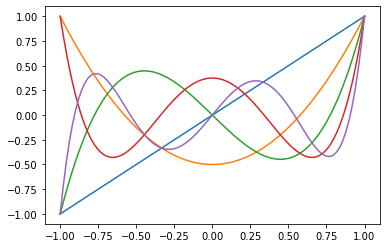

In [22]:
for P in P10[1:6]: 
    Y = np.array([P.subs(z,x) for x in X])
    plt.plot(X,Y)

# Assotiated

In [39]:
def get_P(n, m_max, P_n, x):
    ALPs = []
    dpdx = P_n

    def nextALP(m, dpdx):
        alp = (1-x**2)**(m/2) * dpdx
        # if m%2==1:
        #     alp *= root(1-x**2, 2)
        return alp
    
    for m in range(min(n,m_max)):
        ALPs.append(nextALP(m, dpdx))
        dpdx = Derivative(dpdx, x, evaluate=True)
    ALPs.append(nextALP(min(n,m_max), dpdx))
    
    return ALPs

In [41]:
ALPs3 = get_P(3, 3, P10[3], z)

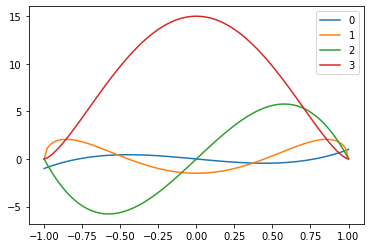

In [44]:
i = 0
for alp in ALPs3:
    Y = []
    for x in X:
        Y.append(alp.subs(z,x))
    plt.plot(X,Y, label = f"{i}")
    i+=1
plt.legend()